#Logistic Regression Project
<p>In this project I will be working with the UCI adult dataset. I will be attempting to predict if people in the dataset belong in a certain class by salary, either making <= 50k or >50k per year.</p>

##Install and load Packages

In [65]:
install.packages("Amelia")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("ggthemes")
install.packages("corrgram")
install.packages("corrplot")
install.packages("caTools")
install.packages("plyr")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
library(Amelia)
library(ggplot2)
library(dplyr)
library(caTools)
library(ggthemes)
library(plyr)
library(caret)

##Read in the dataset

In [67]:
df.adult <- read.csv('/content/adult_sal.csv')

In [68]:
head(df.adult)

,X,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


The index column is duplicated. This will be dropped.

In [69]:
colnames(df.adult)

[1] "X"             "age"           "type_employer" "fnlwgt"       
 [5] "education"     "education_num" "marital"       "occupation"   
 [9] "relationship"  "race"          "sex"           "capital_gain" 
[13] "capital_loss"  "hr_per_week"   "country"       "income"

In [70]:
df.adult <- select(df.adult, -X)

In [71]:
head(df.adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [72]:
str(df.adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "State-gov" "Self-emp-not-inc" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married-civ-spouse" "Divorced" "Married-civ-spouse" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "United-States" "United-States" "U

In [73]:
summary(df.adult)

      age        type_employer          fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education_num     marital           occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

##Data Cleaning

There are a lot of columns that are categorical factors, however a lot of these columns have too many factors than may be necessary. In this section I'll clean these columns by reducing the number of factors.

In [74]:
table(df.adult$type_employer)


               ?      Federal-gov        Local-gov     Never-worked 
            1836              960             2093                7 
         Private     Self-emp-inc Self-emp-not-inc        State-gov 
           22696             1116             2541             1298 
     Without-pay 
              14 

There 1836 NULL values and the "Without-pay" and "Never-worked" are the two smallest groups.


We will combine these two small groups into a single "Unemployed" Category.

In [75]:
unemp <- function(job){
  job <- as.character(job)
  if (job=='Never-worked' | job == 'Without-pay'){
    return('Unemployed')
  }else{
    return(job)
  }
}

In [76]:
df.adult$type_employer <- sapply(df.adult$type_employer,unemp)

In [77]:
table(df.adult$type_employer)


               ?      Federal-gov        Local-gov          Private 
            1836              960             2093            22696 
    Self-emp-inc Self-emp-not-inc        State-gov       Unemployed 
            1116             2541             1298               21 

We'll also combine "State" and "Local-gov" into a category called "SL-gov" and combine the self-employed categories.

In [78]:
group_emp <- function(job){
  if (job=='local-gov'|job=='State-gov'){
    return('SL-gov')
  }else if (job=='Self-emp-inc'|job=='Self-emp-not-inc'){
    return('self-emp')
  }else{
    return(job)
  }
}

In [79]:
df.adult$type_employer <- sapply(df.adult$type_employer,group_emp)

In [80]:
table(df.adult$type_employer)


          ? Federal-gov   Local-gov     Private    self-emp      SL-gov 
       1836         960        2093       22696        3657        1298 
 Unemployed 
         21 

We'll next look at the "Marital" column.

In [81]:
table(df.adult$marital)


             Divorced     Married-AF-spouse    Married-civ-spouse 
                 4443                    23                 14976 
Married-spouse-absent         Never-married             Separated 
                  418                 10683                  1025 
              Widowed 
                  993 

We'll reduce this to three groups, "Married", "Not-Married" and "Never-married".

In [82]:
group_marital <- function(mar){
    mar <- as.character(mar)

    # Not-Married
    if (mar=='Separated' | mar=='Divorced' | mar=='Widowed'){
        return('Not-Married')

    # Never-Married
    }else if(mar=='Never-married'){
        return(mar)

     #Married
    }else{
        return('Married')
    }
}

In [83]:
df.adult$marital <- sapply(df.adult$marital,group_marital)
table(df.adult$marital)


      Married Never-married   Not-Married 
        15417         10683          6461 

We'll next check the "Country" column.

In [84]:
table(df.adult$country)


                         ?                   Cambodia 
                       583                         19 
                    Canada                      China 
                       121                         75 
                  Columbia                       Cuba 
                        59                         95 
        Dominican-Republic                    Ecuador 
                        70                         28 
               El-Salvador                    England 
                       106                         90 
                    France                    Germany 
                        29                        137 
                    Greece                  Guatemala 
                        29                         64 
                     Haiti         Holand-Netherlands 
                        44                          1 
                  Honduras                       Hong 
                        13                         20 
         

We'll reduce the number of categories here by group the countries into continents.

In [85]:
levels(df.adult$country)

NULL

In [86]:
Asia <- c('China','Hong','India','Iran','Cambodia','Japan', 'Laos' ,
          'Philippines' ,'Vietnam' ,'Taiwan', 'Thailand')

North.America <- c('Canada','United-States','Puerto-Rico' )

Europe <- c('England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia')

Latin.and.South.America <- c('Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala','Haiti','Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                            'Jamaica','Trinadad&Tobago')
Other <- c('South')


In [87]:
group_country <- function(ctry){
  if (ctry %in% Asia){
    return ('Asia')
  }else if (ctry %in% North.America){
    return('North.America')
  }else if (ctry %in% Europe){
    return('Europe')
  }else if (ctry %in% Latin.and.South.America){
    return('Latin.and.South.America')
  }else{
    return('Other')
  }
}

In [88]:
df.adult$country <- sapply(df.adult$country,group_country)
table(df.adult$country)


                   Asia                  Europe Latin.and.South.America 
                    671                     521                    1301 
          North.America                   Other 
                  29405                     663 

In [89]:
str(df.adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: chr  "SL-gov" "self-emp" "Private" "Private" ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : chr  "Never-married" "Married" "Not-Married" "Married" ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : chr  "North.America" "North.America" "North.America" "North.America" 

In [90]:
df.adult$type_employer <- sapply(df.adult$type_employer,factor)
df.adult$country <- sapply(df.adult$country,factor)
df.adult$marital <- sapply(df.adult$marital,factor)

In [91]:
str(df.adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 7 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : chr  "Bachelors" "Bachelors" "HS-grad" "11th" ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : Factor w/ 5 levels "North.America",..: 1 1 1 1 

We'll now look at education to see whether we can reduce the number of factors.

In [92]:
table(df.adult$education)


        10th         11th         12th      1st-4th      5th-6th      7th-8th 
         933         1175          433          168          333          646 
         9th   Assoc-acdm    Assoc-voc    Bachelors    Doctorate      HS-grad 
         514         1067         1382         5355          413        10501 
     Masters    Preschool  Prof-school Some-college 
        1723           51          576         7291 

In [93]:
elementary <- c('Preschool','1st-4th','5th-6th','7th-8th','9th')
high.school <- c('10th','11th','12th','9th','HS-grad')
university <- c('Masters','Bachelors','Doctorate','Prof-school')
college <- c('Some-college','Assoc-acdm','Assoc-voc')




In [94]:
group_education <- function(edu){
  if (edu %in% elementary){
    return ('Elementary')
  }else if (edu %in% high.school){
    return('HighSchool')
  }else if (edu %in% university){
    return('University')
  }else{
    return('College')
  }
}

In [95]:
df.adult$education <- sapply(df.adult$education,group_education)
table(df.adult$education)


   College Elementary HighSchool University 
      9740       1712      13042       8067 

In [96]:
df.adult$education <- sapply(df.adult$education,factor)

In [97]:
table(df.adult$education)


University HighSchool Elementary    College 
      8067      13042       1712       9740 

In [98]:
str(df.adult)

'data.frame':	32561 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 7 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 4 levels "University","HighSchool",..: 1 1 2 2 1 1 3 2 1 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : chr  "Adm-clerical" "Exec-managerial" "Handlers-cleaners" "Handlers-cleaners" ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : Factor w/ 5 levels "Nort

###Missing Data
We'll now deal with any missing data. First we'll convert anything with "?" to a NULL value.

In [99]:
df.adult[df.adult == '?'] <- NA

In [100]:
table(df.adult$type_employer)


     SL-gov    self-emp     Private Federal-gov   Local-gov           ? 
       1298        3657       22696         960        2093           0 
 Unemployed 
         21 

In [101]:
df.adult$type_employer <- sapply(df.adult$type_employer,factor)
df.adult$country <- sapply(df.adult$country,factor)
df.adult$marital <- sapply(df.adult$marital,factor)
df.adult$education <- sapply(df.adult$education,factor)
df.adult$occupation <- sapply(df.adult$occupation,factor)
df.adult$income <- sapply(df.adult$income, factor)

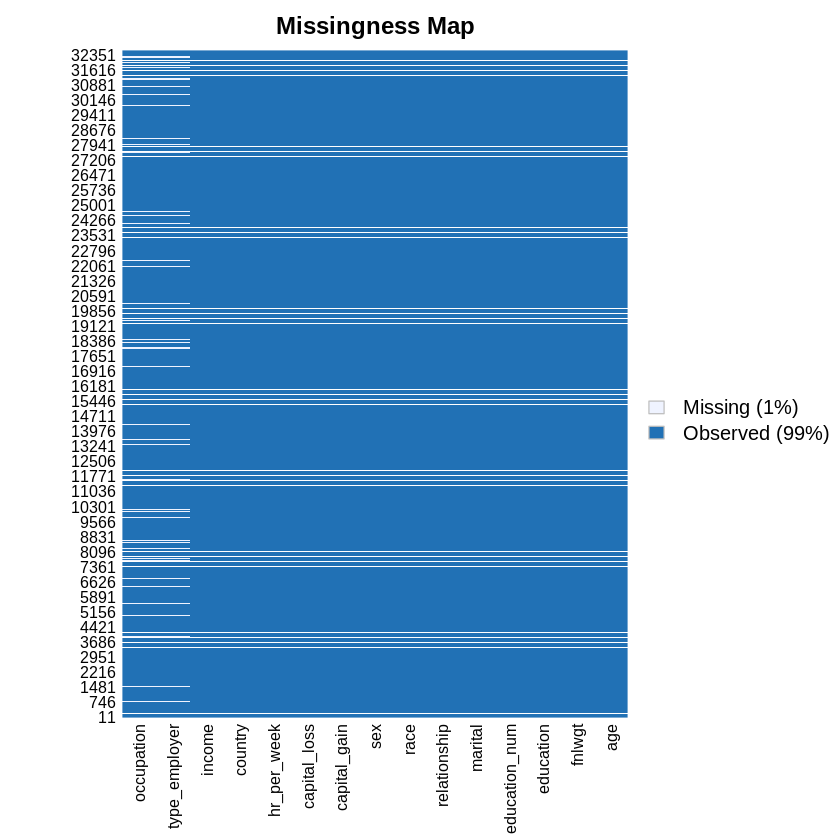

In [102]:
missmap(df.adult)

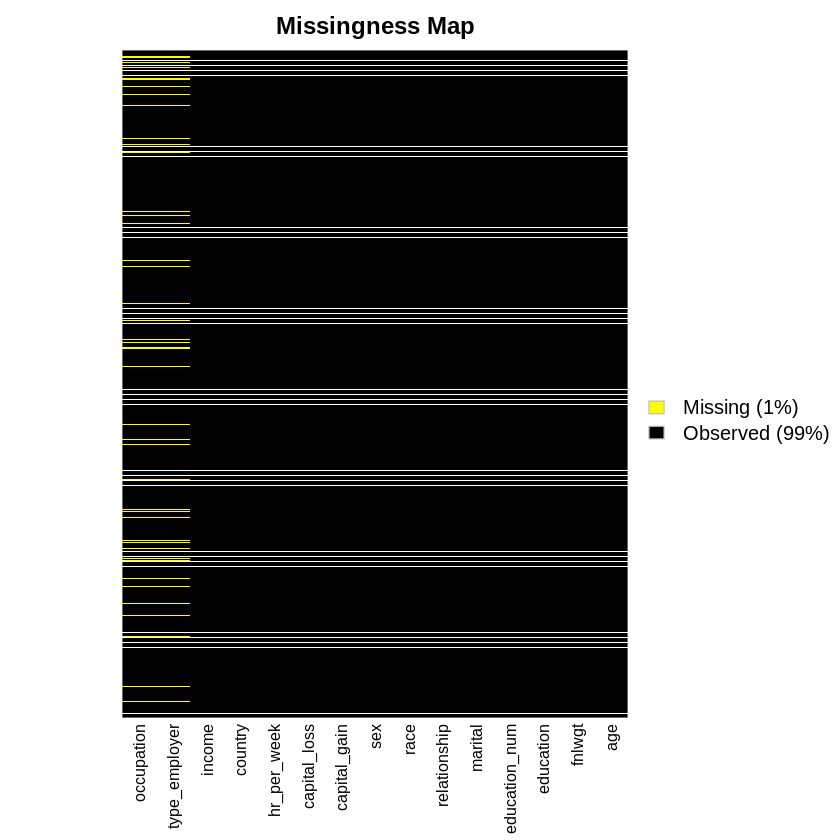

In [103]:
 missmap(df.adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

In [104]:
df.adult <- na.omit(df.adult)

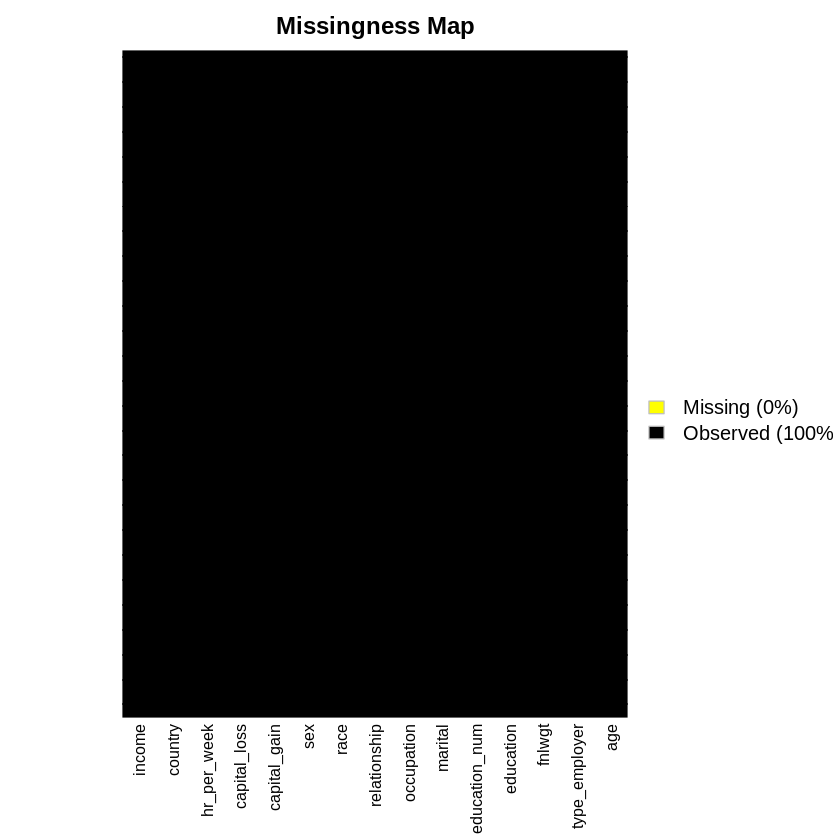

In [105]:
 missmap(df.adult,y.at=c(1),y.labels = c(''),col=c('yellow','black'))

##Data Explorartion

In [106]:
str(df.adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 4 levels "University","HighSchool",..: 1 1 2 2 1 1 3 2 1 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ country      : Factor w/ 5 levels "North.America",..: 1 1 

In [107]:
summary(df.adult)

      age            type_employer       fnlwgt             education    
 Min.   :17.00   SL-gov     : 1298   Min.   :  13769   University: 7813  
 1st Qu.:28.00   self-emp   : 3657   1st Qu.: 117828   HighSchool:12248  
 Median :37.00   Private    :22696   Median : 178517   Elementary: 1541  
 Mean   :38.44   Federal-gov:  960   Mean   : 189846   College   : 9116  
 3rd Qu.:47.00   Local-gov  : 2093   3rd Qu.: 237317                     
 Max.   :90.00   Unemployed :   14   Max.   :1484705                     
                                                                         
 education_num            marital                occupation  
 Min.   : 1.00   Never-married: 9912   Prof-specialty :4140  
 1st Qu.: 9.00   Married      :14749   Craft-repair   :4099  
 Median :10.00   Not-Married  : 6057   Exec-managerial:4066  
 Mean   :10.13                         Adm-clerical   :3770  
 3rd Qu.:13.00                         Sales          :3650  
 Max.   :16.00                      

Plot showing the income.

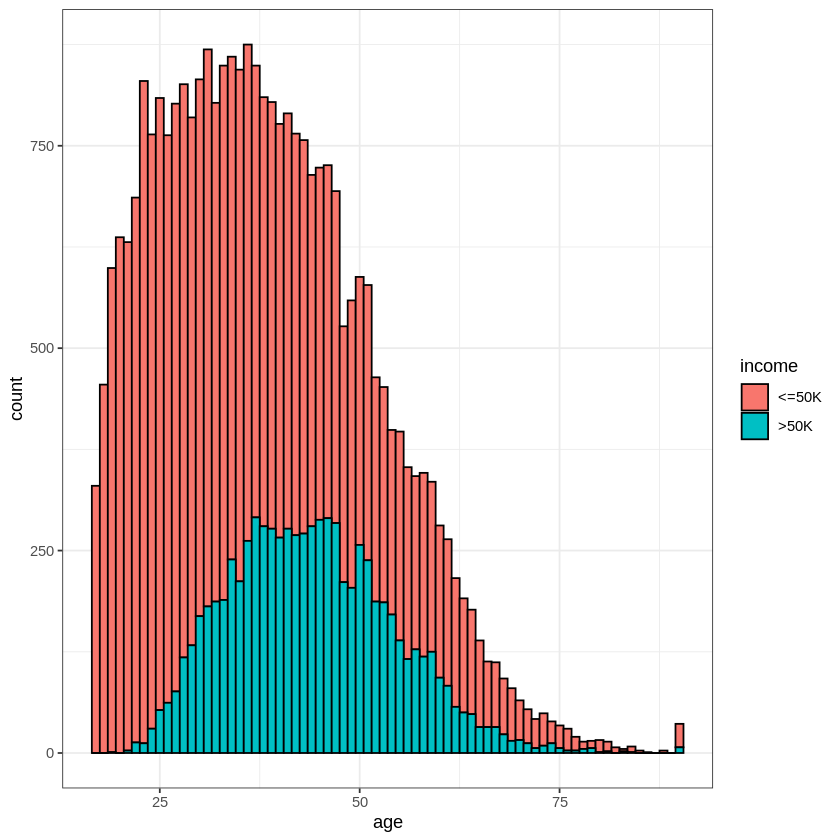

In [108]:
ggplot(df.adult,aes(age)) + geom_histogram(aes(fill=income),color='black',binwidth=1) + theme_bw()

In [109]:
summary(df.adult)

      age            type_employer       fnlwgt             education    
 Min.   :17.00   SL-gov     : 1298   Min.   :  13769   University: 7813  
 1st Qu.:28.00   self-emp   : 3657   1st Qu.: 117828   HighSchool:12248  
 Median :37.00   Private    :22696   Median : 178517   Elementary: 1541  
 Mean   :38.44   Federal-gov:  960   Mean   : 189846   College   : 9116  
 3rd Qu.:47.00   Local-gov  : 2093   3rd Qu.: 237317                     
 Max.   :90.00   Unemployed :   14   Max.   :1484705                     
                                                                         
 education_num            marital                occupation  
 Min.   : 1.00   Never-married: 9912   Prof-specialty :4140  
 1st Qu.: 9.00   Married      :14749   Craft-repair   :4099  
 Median :10.00   Not-Married  : 6057   Exec-managerial:4066  
 Mean   :10.13                         Adm-clerical   :3770  
 3rd Qu.:13.00                         Sales          :3650  
 Max.   :16.00                      

Plot showing the hours worked per week.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


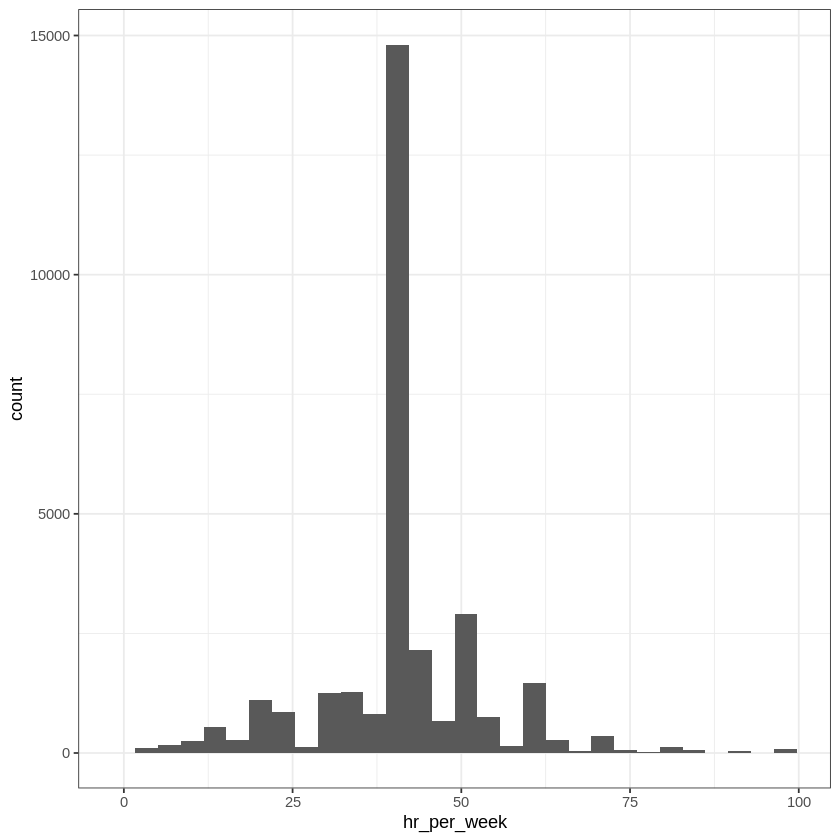

In [110]:
ggplot(df.adult,aes(hr_per_week)) + geom_histogram() + theme_bw()

I'll rename the country column to region column to better reflect the factor levels.

In [111]:
names(df.adult)[names(df.adult)=="country"] <- "region"

In [112]:
str(df.adult)

'data.frame':	30718 obs. of  15 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ type_employer: Factor w/ 6 levels "SL-gov","self-emp",..: 1 2 3 3 3 3 3 2 3 3 ...
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education    : Factor w/ 4 levels "University","HighSchool",..: 1 1 2 2 1 1 3 2 1 1 ...
 $ education_num: int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital      : Factor w/ 3 levels "Never-married",..: 1 2 3 2 2 2 2 2 1 2 ...
 $ occupation   : Factor w/ 14 levels "Adm-clerical",..: 1 2 3 3 4 2 5 2 4 2 ...
 $ relationship : chr  "Not-in-family" "Husband" "Not-in-family" "Husband" ...
 $ race         : chr  "White" "White" "White" "Black" ...
 $ sex          : chr  "Male" "Male" "Male" "Male" ...
 $ capital_gain : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hr_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ region       : Factor w/ 5 levels "North.America",..: 1 1 

A barplot of region with the fill colour showing income class.

In [113]:
ggplot(df.adult,aes(country)) + geom_bar(aes(fill=income),color='black')+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'country' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

##Building a Model
We'll classify people into two groups: Above or Below 50k in Salary.

###Logistic Regression
Logistic Regression is a type of classification model. In classification models, we attempt to predict the outcome of categorical dependent variables, using one or more independent variables. The independent variables can be either categorical or numerical.

Logistic regression is based on the logistic function, which always takes values between 0 and 1. Replacing the dependent variable of the logistic function with a linear combination of dependent variables we intend to use for regression, we arrive at the formula for logistic regression.

In [114]:
head(df.adult)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,region,income
,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<fct>,<fct>
1,39,SL-gov,77516,University,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North.America,<=50K
2,50,self-emp,83311,University,13,Married,Exec-managerial,Husband,White,Male,0,0,13,North.America,<=50K
3,38,Private,215646,HighSchool,9,Not-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North.America,<=50K
4,53,Private,234721,HighSchool,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,North.America,<=50K
5,28,Private,338409,University,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Latin.and.South.America,<=50K
6,37,Private,284582,University,14,Married,Exec-managerial,Wife,White,Female,0,0,40,North.America,<=50K


###Traing Test Split
We'll split the data into a train and test set using the caTools library.

In [115]:
set.seed(101)
sample <- sample.split(df.adult$income,SplitRatio = 0.70)

In [116]:
train = subset(df.adult, sample == TRUE)
test = subset(df.adult, sample == FALSE)

###Training the Model
glm is used to fit generalised linear models, specified by giving a symbolic description of the linear predictor and a description of the error distribution.

####Details
A typical predictor has the form response - terms where response is the (numeric) response vector and terms is a series of terms which specifies a linear predictor for response. For binomial and quasibinomial families the response can also be specified as a factor (when the first level denotes failure and all others success) or as a two-column matrix with the columns giving the numbers of successes and failures. A terms specification of the form first + second indicates all the terms in first together with all the terms in second with any duplicates removed.



In [117]:
model = glm(income ~ ., family = binomial(logit), data = train)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [118]:
summary(model)


Call:
glm(formula = income ~ ., family = binomial(logit), data = train)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -8.396e+00  5.499e-01 -15.268  < 2e-16 ***
age                            2.587e-02  1.992e-03  12.985  < 2e-16 ***
type_employerself-emp         -1.595e-02  1.198e-01  -0.133 0.894090    
type_employerPrivate           2.081e-01  1.081e-01   1.926 0.054135 .  
type_employerFederal-gov       6.494e-01  1.493e-01   4.349 1.37e-05 ***
type_employerLocal-gov        -4.989e-02  1.276e-01  -0.391 0.695738    
type_employerUnemployed       -1.153e+01  1.357e+02  -0.085 0.932279    
fnlwgt                         5.320e-07  2.079e-07   2.560 0.010477 *  
educationHighSchool           -2.625e-01  1.445e-01  -1.816 0.069296 .  
educationElementary           -2.102e-01  3.110e-01  -0.676 0.499201    
educationCollege              -1.744e-01  1.022e-01  -1.707 0.087840 .  
education_num                  2.397

There are a lot of features, we will use a built-in R feature "step"

In [119]:
new.step.model <- step(model)

Start:  AIC=14128.62
income ~ age + type_employer + fnlwgt + education + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                Df Deviance   AIC
- education      3    14046 14128
<none>                14041 14129
- fnlwgt         1    14047 14133
- race           4    14055 14135
- region         4    14062 14142
- type_employer  5    14086 14164
- marital        2    14094 14178
- education_num  1    14111 14197
- sex            1    14133 14219
- age            1    14210 14296
- capital_loss   1    14255 14341
- hr_per_week    1    14266 14352
- relationship   5    14326 14404
- occupation    13    14482 14544
- capital_gain   1    15279 15365


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=14128.37
income ~ age + type_employer + fnlwgt + education_num + marital + 
    occupation + relationship + race + sex + capital_gain + capital_loss + 
    hr_per_week + region



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


                Df Deviance   AIC
<none>                14046 14128
- fnlwgt         1    14053 14133
- race           4    14061 14135
- region         4    14066 14140
- type_employer  5    14092 14164
- marital        2    14099 14177
- sex            1    14140 14220
- age            1    14220 14300
- capital_loss   1    14261 14341
- hr_per_week    1    14270 14350
- relationship   5    14331 14403
- occupation    13    14499 14555
- education_num  1    14718 14798
- capital_gain   1    15286 15366


In [120]:
summary(new.step.model)


Call:
glm(formula = income ~ age + type_employer + fnlwgt + education_num + 
    marital + occupation + relationship + race + sex + capital_gain + 
    capital_loss + hr_per_week + region, family = binomial(logit), 
    data = train)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -8.998e+00  4.054e-01 -22.198  < 2e-16 ***
age                            2.603e-02  1.982e-03  13.132  < 2e-16 ***
type_employerself-emp         -1.816e-02  1.198e-01  -0.152 0.879535    
type_employerPrivate           2.100e-01  1.080e-01   1.944 0.051903 .  
type_employerFederal-gov       6.471e-01  1.492e-01   4.339 1.43e-05 ***
type_employerLocal-gov        -4.342e-02  1.275e-01  -0.341 0.733407    
type_employerUnemployed       -1.155e+01  1.346e+02  -0.086 0.931664    
fnlwgt                         5.351e-07  2.076e-07   2.577 0.009958 ** 
education_num                  2.798e-01  1.135e-02  24.650  < 2e-16 ***
maritalMarried      

In [121]:
test$predicted.income = predict(model, newdata=test, type="response")

table(test$income, test$predicted.income > 0.5)

       
        FALSE TRUE
  <=50K  6375  545
  >50K    864 1431

The confusion matrix above shows that in total we have correctly predicted 7806 results out of a total of 9215. Which means we incorrectly predicted 1409 results.

In [122]:
(6375+1431)/(6375+545+864+1431)*100

[1] 84.70971

In [123]:
#Failure rate
(545+864)/(6375+545+864+1431)*100

[1] 15.29029

In [124]:
#recall
6375/(6375+545)*100

[1] 92.12428

In [125]:
#precision
6735/(6375+864)*100

[1] 93.03771

Overall the model had an accuracy of 84%, a precision rate of 93% and a recall rate of 92% and a misclassification rate of 15%.

Overall this is a pretty accurate and precise model.